In [ ]:
# old code from online instructions at https://contact.citrine.io/blog/2015/3/3/machine-learning-mat-sci-1
# doesn't work, seems that developer at material project delete the API for make all combinations from periodic_table
# from pymatgen import MPRester, periodic_table
# import itertools

# API_KEY = 'IJeQxmCAHlrKGW4T' # You have to register with Materials Project to receive an API

# # There are 103 elements in pymatgen's list, giving C(103, 2) = 5253 binary systems
# allBinaries = itertools.combinations(periodic_table.Specie, 2) # Create list of all binary systems

# with MPRester(API_KEY) as m:
#     for system in allBinaries:
#         results = m.get_data(system[0] + '-' + system[1], data_type='vasp') # Download DFT data for each binary system
#         for material in results: # We will receive many compounds within each binary system
#             if material['e_above_hull'] < 1e-6: # Check if this compound is thermodynamically stable
#                 print(material['pretty_formula'] + ',' + str(material['band_gap'])) # Output band gap csv to the screen      

### The data below comes from following database
http://bg.imet-db.ru/api/

In [62]:
import urllib2  # the lib that handles the url stuff
data = urllib2.urlopen("http://bg.imet-db.ru/api/?mode=system&format=json") # it's a file like object and works just like a file
for line in data: # files are iterable
    Temp=eval(line)
    #print line
# typo ")-Cr-Li-Te"
Temp[0]="Cr-Li-Te"
# typo "0-Ga-Sn-Zn"
Temp[1]="Ga-Sn-Zn"
# typo 'Mn-S1-Sb-Sm'
Temp[1772]="Mn-S-Sb-Sm"
# this one is not in material project
Temp.remove("As-Pb-S-Sb")

### Somedata they are connected with ',' instead of '-', below is the code to replace

In [244]:
for i,elem in enumerate(Temp):
    if ',' in elem: 
#        print elem
#        print elem.replace(',','-')
        Temp[i]=elem.replace(',','-')
# another mistake in the database to fix
    if elem=='Bi-e-K-Rb': Temp[i]='Bi-Er-K-Rb' #
    if elem=='Cu-Se-Si-Zm': Temp[i]='Cu-Se-Si-Sm' #

## Save the index data to pickle file

In [249]:
from six.moves import cPickle as pickle
pickle_file = 'SemicoductorSystems.pickle'

try:
  f = open(pickle_file, 'wb')
  save = {
    'Namesys':Temp,
    }
  pickle.dump(save, f, pickle.HIGHEST_PROTOCOL)
  f.close()
except Exception as e:
  print('Unable to save data to', pickle_file, ':', e)
  raise

## Load the index data from pickle file

In [68]:
from six.moves import cPickle as pickle
pickle_file = 'SemicoductorSystems.pickle'
with open(pickle_file, 'rb') as f:
  save = pickle.load(f)
  Temp = save['Namesys']
  del save  # hint to help gc free up memory

## Dowload the data and Save to pickle file 
Now lets download some data from material project data base at 
https://materialsproject.org

In [ ]:
import warnings
warnings.filterwarnings('ignore')

from pymatgen import MPRester, periodic_table
import itertools

API_KEY = 'IJeQxmCAHlrKGW4T' # You have to register with Materials Project to receive an API
#partial=10
partial=len(Temp)
breakpoint=1162
Temp2=Temp[breakpoint:partial]
#database=[]

import time
start=time.time()

with MPRester(API_KEY) as m:
#    results = m.get_data(Temp[190], data_type='vasp')
    for system in Temp2:
        results = m.get_data(system, data_type='vasp') # Download DFT data for each binary system
        if results !=[]:
          for material in results: # We will receive many compounds within each binary system
            if (material['band_gap']>0) and (material['e_above_hull'] < 1e-6): # Check if this compound is thermodynamically stable
                #print(material['pretty_formula'] + ',' + str(material['band_gap'])) # Output band gap csv to the screen 
                database.append(material)
timecost=time.time()-start
#write to SemiDataBase pickle file
from six.moves import cPickle as pickle
pickle_file = 'SemiDataBase.pickle'

try:
  f = open(pickle_file, 'wb')
  save = {
    'database':database,
    }
  pickle.dump(save, f, pickle.HIGHEST_PROTOCOL)
  f.close()
except Exception as e:
  print('Unable to save data to', pickle_file, ':', e)
  raise

# Load the saved Data

In [207]:
from six.moves import cPickle as pickle
pickle_file = 'SemiDataBase.pickle'
with open(pickle_file, 'rb') as f:
  save = pickle.load(f)
  database= save['database']
  del save  # hint to help gc free up memory

In [ ]:
# a quick look at 11th item of data
for key in database[11]:
    print key,">>>>>>>>>>>>>>>>>>>>>",database[11][key]

### The code below gives an intuitive look at the elements distribution in periodic table

In [223]:

from pymatgen import MPRester, periodic_table
from pymatgen import Composition, Element
import itertools
# list1=[1,2,3]
# 4 in list1
list2=[]
# for ele in database[1]["elements"]:
#     print ele
#     print type(ele)
#     list2.append(ele)

# Creates a list containing 5 lists, each of 8 items, all set to 0

# creat an matrix for periorod table

w, h = 18, 9;
Matrix = [['**' for x in range(w)] for y in range(h)] 
Matrix2 = [[0 for x in range(w)] for y in range(h)] 

for data in database:
    for elem in data["elements"]:
#         elem.row()
        if elem not in list2:
            list2.append(elem)
            Matrix[Element(elem).row-1][Element(elem).group-1]=elem
for data in database:
    for elem in data["elements"]:          
            Matrix2[Element(elem).row-1][Element(elem).group-1]=Matrix2[Element(elem).row-1][Element(elem).group-1]+1

print "elements appear in the dataset"
print "#"*94
for row in range(h): 
    print "#",
    for col in range(w):
        print '%4s' % Matrix[row][col],
    print " #",
    print
print "#"*94
print "Count of the elements appearance"
print "#"*94
for row in range(h): 
    print "#",
    for col in range(w):
        print '%4d' % Matrix2[row][col],
    print " #",
    print
print "#"*94

elements appear in the dataset
##############################################################################################
#    H   **   **   **   **   **   **   **   **   **   **   **   **   **   **   **   **   **  #
#   Li   Be   **   **   **   **   **   **   **   **   **   **    B    C    N    O    F   **  #
#   Na   Mg   **   **   **   **   **   **   **   **   **   **   Al   Si    P    S   Cl   **  #
#    K   Ca   Sc   Ti    V   Cr   Mn   Fe   Co   Ni   Cu   Zn   Ga   Ge   As   Se   Br   **  #
#   Rb   Sr    Y   Zr   Nb   Mo   Tc   Ru   Rh   Pd   Ag   Cd   In   Sn   Sb   Te    I   **  #
#   Cs   Ba   **   Hf   Ta    W   Re   Os   Ir   Pt   Au   Hg   Tl   Pb   Bi   **   **   **  #
#   **   **   **   **   **   **   **   **   **   **   **   **   **   **   **   **   **   **  #
#   **   **   La   Ce   Pr   Nd   **   Sm   Eu   Gd   Tb   Dy   Ho   Er   Tm   Yb   Lu   **  #
#   **   **   **   Th   **    U   **   **   **   **   **   **   **   **   **   **   **   **  #
###################

## manipulate the data(make into traning data set format)

This step will make three data sets, PTFeatures will be vectors with (9x18) dimensions represents the elements in periodic table. bandgaps will contains all the bandgap info.

In [224]:
materials = []
bandgaps = []
PTFeatures = []

for item in database:
    materials.append(item["full_formula"])
    bandgaps.append(item["band_gap"])

def PeriodicTableVectorize(composition):
       vector = zeros((9,18)) # size of periodic table
       for element in composition:
               fraction = composition.get_atomic_fraction(element)
               vector[element.row-1,element.group-1] = fraction
       return(vector)

for item in materials:
       material = Composition(item)
       PTFeatures.append(PeriodicTableVectorize(material)) #create features from chemical formula

import numpy as np
import random
Fulldata=np.asarray(PTFeatures)
print "data dimensions is", Fulldata.shape
labels=np.asarray(bandgaps)
print "label dimensions is", labels.shape
# since the data it self is 

data dimensions is (1530, 9, 18)
label dimensions is (1530,)


In [399]:
def randomize(dataset, labels):
  permutation = np.random.permutation(labels.shape[0])
  shuffled_dataset = dataset[permutation,:,:]
  shuffled_labels = labels[permutation]
  return shuffled_dataset, shuffled_labels
# train_dataset, train_labels = randomize(train_dataset, train_labels)
# test_dataset, test_labels = randomize(test_dataset, test_labels)
# valid_dataset, valid_labels = randomize(valid_dataset, valid_labels)

# shuffle  the data
Fulldata,labels=randomize(Fulldata,labels)

## Save machine learning data to pickle

In [438]:
from six.moves import cPickle as pickle
pickle_file = 'MachineLearningData.pickle'

try:
  f = open(pickle_file, 'wb')
  save = {
    'Fulldata':Fulldata,
    'labels':labels,
    }
  pickle.dump(save, f, pickle.HIGHEST_PROTOCOL)
  f.close()
except Exception as e:
  print('Unable to save data to', pickle_file, ':', e)
  raise

## Load machine learning data to pickle 

In [439]:
from six.moves import cPickle as pickle
pickle_file = 'MachineLearningData.pickle'
with open(pickle_file, 'rb') as f:
  save = pickle.load(f)
  Fulldata = save['Fulldata']
  labels = save['labels']
  del save  # hint to help gc free up memory

# Machine learning
## Linear Regression

In [247]:
baselineError = mean(abs(mean(train_labels) - train_labels))
print("The MAE of always guessing the average band gap is: " + str(round(baselineError, 3)) + " eV")

The MAE of always guessing the average band gap is: 1.081 eV


The MAE of the linear ridge regression band gap model using the naive feature set is: 0.683 eV


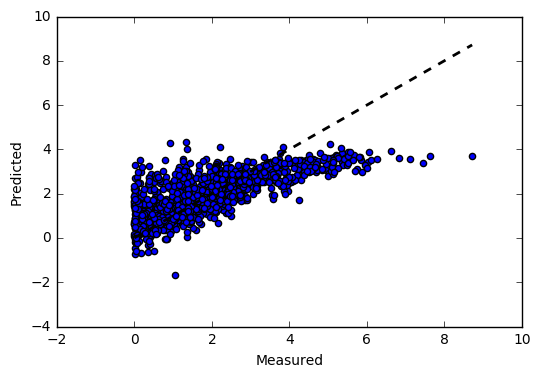

In [407]:
# Train linear ridge regression model using naive feature set
import warnings
warnings.filterwarnings('ignore')
from sklearn import linear_model, cross_validation, metrics, ensemble

train_dataset=Fulldata[0:1300]
train_labels=labels[0:1300]
test_dataset=Fulldata[1300:1531]
test_labels=labels[1300:1531]

num_samples=train_dataset.shape[0]
#this won't work if num_samples are too small, if num_samples is too small, all Y is 0( the first number type), so it has to be large engouh
(samples, width, height) = train_dataset.shape
X = np.reshape(train_dataset,(samples,width*height))[0:num_samples]
Y = train_labels[0:num_samples]

#alpha is a tuning parameter affecting how regression deals with collinear inputs
linear = linear_model.Ridge(alpha = 0.6)  

cv = cross_validation.ShuffleSplit(len(Y),n_iter=10, test_size=0.1, random_state=0)

scores = cross_validation.cross_val_score(linear, X,Y, cv=cv, scoring='mean_absolute_error')

print("The MAE of the linear ridge regression band gap model using the naive feature set is: "+ str(round(abs(mean(scores)), 3)) + " eV")
############# plot it##########################################
from sklearn.model_selection import cross_val_predict
predicted = cross_val_predict(linear, X, Y, cv=10)
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.scatter(Y, predicted)
ax.plot([Y.min(), Y.max()], [Y.min(), Y.max()], 'k--', lw=2)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

## Neural networks
### without hidden layer

In [415]:
# image_size = 28
num_labels = 1
train_end=1100
valid_end=1300
train_dataset=Fulldata[0:train_end]
train_labels=labels[0:train_end]
valid_dataset=Fulldata[train_end:valid_end]
valid_labels=labels[train_end:valid_end]
test_dataset=Fulldata[valid_end:1531]
test_labels=labels[valid_end:1531]

def reformat(dataset, labels):
  dataset = dataset.reshape((-1, Fulldata.shape[1] * Fulldata.shape[2])).astype(np.float32)
  labels = (labels[:,None]).astype(np.float32)
  return dataset, labels
train_dataset, train_labels = reformat(train_dataset, train_labels)
valid_dataset, valid_labels = reformat(valid_dataset, valid_labels)
test_dataset, test_labels = reformat(test_dataset, test_labels)
print('Training set', train_dataset.shape, train_labels.shape)
print('Validation set', valid_dataset.shape, valid_labels.shape)
print('Test set', test_dataset.shape, test_labels.shape)

('Training set', (1100, 162), (1100, 1))
('Validation set', (200, 162), (200, 1))
('Test set', (230, 162), (230, 1))


In [444]:
# With gradient descent training, even this much data is prohibitive.
# Subset the training data for faster turnaround.

train_subset = train_end
# label dimention is 1
num_labels=1
import tensorflow as tf
from tensorflow import contrib
graph = tf.Graph()
with graph.as_default():
  tf_train_dataset = tf.constant(train_dataset[:train_subset, :])
  tf_train_labels = tf.constant(train_labels[:train_subset])
  tf_valid_dataset = tf.constant(valid_dataset)
  tf_valid_labels = tf.constant(valid_labels)
  tf_test_dataset = tf.constant(test_dataset)
  tf_test_labels = tf.constant(test_labels)

  weights = tf.Variable(tf.truncated_normal([Fulldata.shape[1] * Fulldata.shape[2], num_labels]))
  biases = tf.Variable(tf.zeros([num_labels]))

  logits = tf.matmul(tf_train_dataset, weights) + biases
  loss = tf.reduce_mean(tf.abs(logits-tf_train_labels))

  optimizer = tf.train.GradientDescentOptimizer(0.5).minimize(loss)
  train_prediction = logits  

  valid_prediction = tf.matmul(tf_valid_dataset, weights) + biases
  valid_loss = tf.reduce_mean(tf.abs(valid_prediction-tf_valid_labels))
    
  test_prediction = tf.matmul(tf_test_dataset, weights) + biases
  test_loss = tf.reduce_mean(tf.abs(test_prediction-tf_test_labels))
#########################################################################################3
num_steps = 50000
with tf.Session(graph=graph) as session:
  tf.initialize_all_variables().run()
  print('Initialized')
  for step in range(num_steps):
    _, l, predictions = session.run([optimizer, loss, train_prediction])
    if (step % 10000 == 0):
      print('Loss at step %d: %f' % (step, l))
      print('Validation Loss: %f' % valid_loss.eval())
  print('Test Loss: %f' %  test_loss.eval())

Initialized
Loss at step 0: 1.883463
Validation Loss: 1.584549
Loss at step 10000: 0.636692
Validation Loss: 0.687881
Loss at step 20000: 0.631331
Validation Loss: 0.686636
Loss at step 30000: 0.629745
Validation Loss: 0.683074
Loss at step 40000: 0.629499
Validation Loss: 0.682205
Test Loss: 0.664910


## with one hidden layer, train with batch

In [443]:
batch_size = 128
num_hidden_nodes = 1024

train_subset = train_end
batch_size = train_subset/10
num_hidden_nodes = 1024
# label dimention is 1
num_labels=1
import tensorflow as tf
from tensorflow import contrib
graph = tf.Graph()
with graph.as_default():
  tf_train_dataset = tf.placeholder(tf.float32,shape=(batch_size, 162))  
  #tf_train_dataset = tf.constant(train_dataset[:batch_size, :])
  tf_train_labels = tf.placeholder(tf.float32, shape=(batch_size,1))
  #tf_train_labels = tf.constant(train_labels[:batch_size])

  weights_1 = tf.Variable(tf.truncated_normal([Fulldata.shape[1] * Fulldata.shape[2], num_hidden_nodes]))
  weights_2 =  tf.Variable(tf.truncated_normal([num_hidden_nodes, num_labels]))
  biases_1 = tf.Variable(tf.zeros([num_hidden_nodes]))
  biases_2 = tf.Variable(tf.zeros([num_labels]))
  
  layer_1 = tf.nn.relu(tf.matmul(tf_train_dataset, weights_1) + biases_1)
  logits = tf.matmul(layer_1, weights_2) + biases_2
  loss = tf.reduce_mean(tf.abs(logits-tf_train_labels))

  optimizer = tf.train.GradientDescentOptimizer(0.5).minimize(loss)
  train_prediction = logits  

#########################################################################################    
  tf_valid_dataset = tf.constant(valid_dataset)
  tf_valid_labels = tf.constant(valid_labels)
  tf_test_dataset = tf.constant(test_dataset)
  tf_test_labels = tf.constant(test_labels)

  layer_1_valid = tf.nn.relu(tf.matmul(tf_valid_dataset, weights_1) + biases_1)
  valid_prediction = tf.matmul(layer_1_valid, weights_2) + biases_2
  valid_loss = tf.reduce_mean(tf.abs(valid_prediction-tf_valid_labels))
    
  layer_1_test = tf.nn.relu(tf.matmul(tf_test_dataset, weights_1) + biases_1)
  test_prediction = tf.matmul(layer_1_test, weights_2) + biases_2
  test_loss = tf.reduce_mean(tf.abs(test_prediction-tf_test_labels))
  #########################################################################################3
num_steps = 10000
with tf.Session(graph=graph) as session:
  tf.initialize_all_variables().run()
  print('Initialized')
  for step in range(num_steps):
    offset = (step * batch_size) % (train_labels.shape[0] - batch_size)
    batch_data = train_dataset[offset:(offset + batch_size), :]
    batch_labels = train_labels[offset:(offset + batch_size), :]
    feed_dict = {tf_train_dataset : batch_data, tf_train_labels : batch_labels}
    #_, l, predictions = session.run([optimizer, loss, train_prediction])
    _, l, predictions = session.run([optimizer, loss, train_prediction], feed_dict=feed_dict)
    if (step % 1000 == 0):
      print('Loss at step %d: %f' % (step, l))
      print('Validation Loss: %f' % valid_loss.eval())
  print('Test Loss: %f' %  test_loss.eval())

Initialized
Loss at step 0: 9.913927
Validation Loss: 28.716265
Loss at step 1000: 0.553740
Validation Loss: 0.936711
Loss at step 2000: 0.622823
Validation Loss: 0.750750
Loss at step 3000: 0.440426
Validation Loss: 0.861358
Loss at step 4000: 0.458674
Validation Loss: 0.795093
Loss at step 5000: 0.436431
Validation Loss: 0.765197
Loss at step 6000: 0.478887
Validation Loss: 0.790238
Loss at step 7000: 0.420878
Validation Loss: 0.786454
Loss at step 8000: 0.320174
Validation Loss: 0.656050
Loss at step 9000: 0.290202
Validation Loss: 0.717809
Test Loss: 0.690147


## Add regulation to previous one

In [456]:
batch_size = 128
num_hidden_nodes = 1024
# so far 1e-3 yields best result 0.599
beta=1e-3

train_subset = train_end
batch_size = train_subset/10
num_hidden_nodes = 1024
# label dimention is 1
num_labels=1
import tensorflow as tf
from tensorflow import contrib
graph = tf.Graph()
with graph.as_default():
  tf_train_dataset = tf.placeholder(tf.float32,shape=(batch_size, 162))  
  #tf_train_dataset = tf.constant(train_dataset[:batch_size, :])
  tf_train_labels = tf.placeholder(tf.float32, shape=(batch_size,1))
  #tf_train_labels = tf.constant(train_labels[:batch_size])

  weights_1 = tf.Variable(tf.truncated_normal([Fulldata.shape[1] * Fulldata.shape[2], num_hidden_nodes]))
  weights_2 =  tf.Variable(tf.truncated_normal([num_hidden_nodes, num_labels]))
  biases_1 = tf.Variable(tf.zeros([num_hidden_nodes]))
  biases_2 = tf.Variable(tf.zeros([num_labels]))
  
  layer_1 = tf.nn.relu(tf.matmul(tf_train_dataset, weights_1) + biases_1)
  logits = tf.matmul(layer_1, weights_2) + biases_2
  loss = tf.reduce_mean(tf.abs(logits-tf_train_labels))+beta*(tf.nn.l2_loss(weights_1)+tf.nn.l2_loss(weights_2))

  optimizer = tf.train.GradientDescentOptimizer(0.5).minimize(loss)
  
  train_prediction = logits  

#########################################################################################    
  tf_valid_dataset = tf.constant(valid_dataset)
  tf_valid_labels = tf.constant(valid_labels)
  tf_test_dataset = tf.constant(test_dataset)
  tf_test_labels = tf.constant(test_labels)

  layer_1_valid = tf.nn.relu(tf.matmul(tf_valid_dataset, weights_1) + biases_1)
  valid_prediction = tf.matmul(layer_1_valid, weights_2) + biases_2
  valid_loss = tf.reduce_mean(tf.abs(valid_prediction-tf_valid_labels))
    
  layer_1_test = tf.nn.relu(tf.matmul(tf_test_dataset, weights_1) + biases_1)
  test_prediction = tf.matmul(layer_1_test, weights_2) + biases_2
  test_loss = tf.reduce_mean(tf.abs(test_prediction-tf_test_labels))
  #########################################################################################3
num_steps = 100000
with tf.Session(graph=graph) as session:
  tf.initialize_all_variables().run()
  print('Initialized')
  for step in range(num_steps):
    offset = (step * batch_size) % (train_labels.shape[0] - batch_size)
    batch_data = train_dataset[offset:(offset + batch_size), :]
    batch_labels = train_labels[offset:(offset + batch_size), :]
    feed_dict = {tf_train_dataset : batch_data, tf_train_labels : batch_labels}
    #_, l, predictions = session.run([optimizer, loss, train_prediction])
    _, l, predictions = session.run([optimizer, loss, train_prediction], feed_dict=feed_dict)
    if (step % 10000 == 0):
      print('Loss at step %d: %f' % (step, l))
      print('Validation Loss: %f' % valid_loss.eval())
  print('Test Loss: %f' %  test_loss.eval())

Initialized
Loss at step 0: 75.267990
Validation Loss: 17.111399
Loss at step 10000: 0.614537
Validation Loss: 0.646773
Loss at step 20000: 0.731811
Validation Loss: 0.788381
Loss at step 30000: 0.672801
Validation Loss: 0.639590
Loss at step 40000: 0.649371
Validation Loss: 0.679590
Loss at step 50000: 0.613999
Validation Loss: 0.703059
Loss at step 60000: 0.612504
Validation Loss: 0.822633
Loss at step 70000: 0.581319
Validation Loss: 0.941529
Loss at step 80000: 0.696750
Validation Loss: 0.687981
Loss at step 90000: 0.505735
Validation Loss: 0.599858
Test Loss: 0.608422


## Dropout added to previous test

In [462]:
batch_size = 128
num_hidden_nodes = 1024
# so far 1e-3 yields best result 0.599
beta=1e-3

train_subset = train_end
batch_size = train_subset/10
num_hidden_nodes = 1024
# label dimention is 1
num_labels=1
import tensorflow as tf
from tensorflow import contrib
graph = tf.Graph()
with graph.as_default():
  tf_train_dataset = tf.placeholder(tf.float32,shape=(batch_size, 162))  
  #tf_train_dataset = tf.constant(train_dataset[:batch_size, :])
  tf_train_labels = tf.placeholder(tf.float32, shape=(batch_size,1))
  #tf_train_labels = tf.constant(train_labels[:batch_size])

  weights_1 = tf.Variable(tf.truncated_normal([Fulldata.shape[1] * Fulldata.shape[2], num_hidden_nodes]))
  weights_2 =  tf.Variable(tf.truncated_normal([num_hidden_nodes, num_labels]))
  biases_1 = tf.Variable(tf.zeros([num_hidden_nodes]))
  biases_2 = tf.Variable(tf.zeros([num_labels]))
  
  layer_1 = tf.nn.dropout(tf.nn.relu(tf.matmul(tf_train_dataset, weights_1) + biases_1),keep_prob=0.8)
  logits = tf.matmul(layer_1, weights_2) + biases_2
  loss = tf.reduce_mean(tf.abs(logits-tf_train_labels))+beta*(tf.nn.l2_loss(weights_1)+tf.nn.l2_loss(weights_2))

  optimizer = tf.train.GradientDescentOptimizer(0.5).minimize(loss)
#########################################################################################
  layer_1_train= tf.nn.relu(tf.matmul(tf_train_dataset, weights_1) + biases_1)
  train_prediction = tf.matmul(layer_1_train, weights_2) + biases_2  

#########################################################################################    
  tf_valid_dataset = tf.constant(valid_dataset)
  tf_valid_labels = tf.constant(valid_labels)
  tf_test_dataset = tf.constant(test_dataset)
  tf_test_labels = tf.constant(test_labels)

  layer_1_valid = tf.nn.relu(tf.matmul(tf_valid_dataset, weights_1) + biases_1)
  valid_prediction = tf.matmul(layer_1_valid, weights_2) + biases_2
  valid_loss = tf.reduce_mean(tf.abs(valid_prediction-tf_valid_labels))
    
  layer_1_test = tf.nn.relu(tf.matmul(tf_test_dataset, weights_1) + biases_1)
  test_prediction = tf.matmul(layer_1_test, weights_2) + biases_2
  test_loss = tf.reduce_mean(tf.abs(test_prediction-tf_test_labels))
  #########################################################################################3
num_steps = 10000
with tf.Session(graph=graph) as session:
  tf.initialize_all_variables().run()
  print('Initialized')
  for step in range(num_steps):
    offset = (step * batch_size) % (train_labels.shape[0] - batch_size)
    batch_data = train_dataset[offset:(offset + batch_size), :]
    batch_labels = train_labels[offset:(offset + batch_size), :]
    feed_dict = {tf_train_dataset : batch_data, tf_train_labels : batch_labels}
    #_, l, predictions = session.run([optimizer, loss, train_prediction])
    _, l, predictions = session.run([optimizer, loss, train_prediction], feed_dict=feed_dict)
    if (step % 1000 == 0):
      print('Loss at step %d: %f' % (step, l))
      print('Validation Loss: %f' % valid_loss.eval())
  print('Test Loss: %f' %  test_loss.eval())

Initialized
Loss at step 0: 75.242477
Validation Loss: 70.626396
Loss at step 1000: 24.033871
Validation Loss: 0.669397
Loss at step 2000: 9.339220
Validation Loss: 0.742051
Loss at step 3000: 3.788256
Validation Loss: 0.820103
Loss at step 4000: 1.759256
Validation Loss: 0.614750
Loss at step 5000: 0.956293
Validation Loss: 0.597205
Loss at step 6000: 0.883665
Validation Loss: 0.632919
Loss at step 7000: 0.872911
Validation Loss: 0.643003
Loss at step 8000: 0.791690
Validation Loss: 0.668034
Loss at step 9000: 0.552466
Validation Loss: 0.662916
Test Loss: 0.615167


## Below try to use different initial value(stddev) for weight to see if accuracy can be improved,

In [464]:
import math as math
batch_size = 128
num_hidden_nodes = 1024
# so far 1e-3 yields best result 0.599
beta=1e-3

train_subset = train_end
batch_size = train_subset/10
num_hidden_nodes = 1024
# label dimention is 1
num_labels=1
import tensorflow as tf
from tensorflow import contrib
graph = tf.Graph()
dimentions=Fulldata.shape[1] * Fulldata.shape[2]
with graph.as_default():
  tf_train_dataset = tf.placeholder(tf.float32,shape=(batch_size, 162))  
  #tf_train_dataset = tf.constant(train_dataset[:batch_size, :])
  tf_train_labels = tf.placeholder(tf.float32, shape=(batch_size,1))
  #tf_train_labels = tf.constant(train_labels[:batch_size])

  weights_1 = tf.Variable(tf.truncated_normal([dimentions, num_hidden_nodes],
                                              stddev=math.sqrt(2.0/dimentions)))
  weights_2 =  tf.Variable(tf.truncated_normal([num_hidden_nodes, num_labels],
                                               stddev=math.sqrt(2.0/(num_hidden_nodes))))
  biases_1 = tf.Variable(tf.zeros([num_hidden_nodes]))
  biases_2 = tf.Variable(tf.zeros([num_labels]))
  
  layer_1 = tf.nn.dropout(tf.nn.relu(tf.matmul(tf_train_dataset, weights_1) + biases_1),keep_prob=0.8)
  logits = tf.matmul(layer_1, weights_2) + biases_2
  loss = tf.reduce_mean(tf.abs(logits-tf_train_labels))+beta*(tf.nn.l2_loss(weights_1)+tf.nn.l2_loss(weights_2))

  optimizer = tf.train.GradientDescentOptimizer(0.5).minimize(loss)
#########################################################################################  
  layer_1_train= tf.nn.relu(tf.matmul(tf_train_dataset, weights_1) + biases_1)
  train_prediction = tf.matmul(layer_1_train, weights_2) + biases_2  


#########################################################################################    
  tf_valid_dataset = tf.constant(valid_dataset)
  tf_valid_labels = tf.constant(valid_labels)
  tf_test_dataset = tf.constant(test_dataset)
  tf_test_labels = tf.constant(test_labels)

  layer_1_valid = tf.nn.relu(tf.matmul(tf_valid_dataset, weights_1) + biases_1)
  valid_prediction = tf.matmul(layer_1_valid, weights_2) + biases_2
  valid_loss = tf.reduce_mean(tf.abs(valid_prediction-tf_valid_labels))
    
  layer_1_test = tf.nn.relu(tf.matmul(tf_test_dataset, weights_1) + biases_1)
  test_prediction = tf.matmul(layer_1_test, weights_2) + biases_2
  test_loss = tf.reduce_mean(tf.abs(test_prediction-tf_test_labels))
  #########################################################################################3
num_steps = 10000
with tf.Session(graph=graph) as session:
  tf.initialize_all_variables().run()
  print('Initialized')
  for step in range(num_steps):
    offset = (step * batch_size) % (train_labels.shape[0] - batch_size)
    batch_data = train_dataset[offset:(offset + batch_size), :]
    batch_labels = train_labels[offset:(offset + batch_size), :]
    feed_dict = {tf_train_dataset : batch_data, tf_train_labels : batch_labels}
    #_, l, predictions = session.run([optimizer, loss, train_prediction])
    _, l, predictions = session.run([optimizer, loss, train_prediction], feed_dict=feed_dict)
    if (step % 1000 == 0):
      print('Loss at step %d: %f' % (step, l))
      print('Validation Loss: %f' % valid_loss.eval())
  print('Test Loss: %f' %  test_loss.eval())

Initialized
Loss at step 0: 2.575462
Validation Loss: 1.151463
Loss at step 1000: 0.983694
Validation Loss: 0.774037
Loss at step 2000: 0.818250
Validation Loss: 0.799166
Loss at step 3000: 0.633846
Validation Loss: 0.695941
Loss at step 4000: 0.804100
Validation Loss: 0.691766
Loss at step 5000: 0.575336
Validation Loss: 0.676020
Loss at step 6000: 0.821887
Validation Loss: 0.695752
Loss at step 7000: 0.557278
Validation Loss: 0.699531
Loss at step 8000: 0.676409
Validation Loss: 0.649440
Loss at step 9000: 0.590448
Validation Loss: 0.710368
Test Loss: 0.653532


## Two hidden layer

In [ ]:
import math as math
batch_size = 128
num_hidden_nodes = 1024
num_hidden_nodes2=512
# so far 1e-3 yields best result 0.599
beta=1e-3

train_subset = train_end
batch_size = train_subset/10
num_hidden_nodes = 1024
# label dimention is 1
num_labels=1
import tensorflow as tf
from tensorflow import contrib
graph = tf.Graph()
dimentions=Fulldata.shape[1] * Fulldata.shape[2]
with graph.as_default():
  tf_train_dataset = tf.placeholder(tf.float32,shape=(batch_size, 162))  
  #tf_train_dataset = tf.constant(train_dataset[:batch_size, :])
  tf_train_labels = tf.placeholder(tf.float32, shape=(batch_size,1))
  #tf_train_labels = tf.constant(train_labels[:batch_size])

  weights_1 = tf.Variable(tf.truncated_normal([dimentions, num_hidden_nodes],
                                              stddev=math.sqrt(2.0/dimentions)))
  biases_1 = tf.Variable(tf.zeros([num_hidden_nodes]))
  weights_2=tf.Variable(tf.truncated_normal([num_hidden_nodes, num_hidden_nodes2],
                                             stddev=math.sqrt(2.0/(num_hidden_nodes))))
  biases_2=tf.Variable(tf.zeros([num_hidden_nodes2]))
  
  weights_o =  tf.Variable(tf.truncated_normal([num_hidden_nodes2, num_labels],
                                               stddev=math.sqrt(2.0/(num_hidden_nodes))))  
  biases_o = tf.Variable(tf.zeros([num_labels]))
  
  layer_1 = tf.nn.dropout(tf.nn.relu(tf.matmul(tf_train_dataset, weights_1) + biases_1),keep_prob=0.8)
  layer_2=tf.nn.dropout(tf.nn.relu(tf.matmul(layer_1,weights_2)+biases_2),0.75)
  
  logits = tf.matmul(layer_2, weights_o) + biases_o
  
  loss = tf.reduce_mean(tf.abs(logits-tf_train_labels))+beta*(tf.nn.l2_loss(weights_1)+tf.nn.l2_loss(weights_o)+tf.nn.l2_loss(weights_2))

  optimizer = tf.train.GradientDescentOptimizer(0.5).minimize(loss)
#########################################################################################  
  layer_1_train=tf.nn.relu(tf.matmul(tf_train_dataset,weights_1)+biases_1)
  layer_2_train=tf.nn.relu(tf.matmul(layer_1_train,weights_2)+biases_2)
  train_prediction = tf.matmul(layer_2_train, weights_o) + biases_o  

#########################################################################################    
  tf_valid_dataset = tf.constant(valid_dataset)
  tf_valid_labels = tf.constant(valid_labels)
  tf_test_dataset = tf.constant(test_dataset)
  tf_test_labels = tf.constant(test_labels)

  layer_1_valid = tf.nn.relu(tf.matmul(tf_valid_dataset, weights_1) + biases_1)
  layer_2_valid = tf.nn.relu(tf.matmul(layer_1_valid, weights_2) + biases_2)  
  valid_prediction = tf.matmul(layer_2_valid, weights_o) + biases_o
  valid_loss = tf.reduce_mean(tf.abs(valid_prediction-tf_valid_labels))
    
  layer_1_test = tf.nn.relu(tf.matmul(tf_test_dataset, weights_1) + biases_1)
  layer_2_test = tf.nn.relu(tf.matmul(layer_1_test, weights_2) + biases_2)
  test_prediction = tf.matmul(layer_2_test, weights_o) + biases_o
  test_loss = tf.reduce_mean(tf.abs(test_prediction-tf_test_labels))
  #########################################################################################3
num_steps = 10000
with tf.Session(graph=graph) as session:
  tf.initialize_all_variables().run()
  print('Initialized')
  for step in range(num_steps):
    offset = (step * batch_size) % (train_labels.shape[0] - batch_size)
    batch_data = train_dataset[offset:(offset + batch_size), :]
    batch_labels = train_labels[offset:(offset + batch_size), :]
    feed_dict = {tf_train_dataset : batch_data, tf_train_labels : batch_labels}
    #_, l, predictions = session.run([optimizer, loss, train_prediction])
    _, l, predictions = session.run([optimizer, loss, train_prediction], feed_dict=feed_dict)
    if (step % 1000 == 0):
      print('Loss at step %d: %f' % (step, l))
      print('Validation Loss: %f' % valid_loss.eval())
  print('Test Loss: %f' %  test_loss.eval())

Initialized
Loss at step 0: 3.046521
Validation Loss: 1.232555
Loss at step 1000: 1.095721
Validation Loss: 0.630546
